${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{0}}}$  L0范数:表示向量x中非零元素的个数  
${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{1}}}$  L1范数（列模）:表示向量x中非零元素的绝对值之和  
${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{2}}}$  L2范数（谱模）:表示向量元素的平方和再开平方求$A^{T}A$的特征值，找出其中的最大特征值，求其平方根,相当于$max(sqrt(eig(A^{T}A)))$，也叫谱范数  
${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{F}}}$  F范数:是把一个矩阵中每个元素的平方求和后开根号(用于表示矩阵量级)   
${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{\infty}}}$  无穷范数（行模）:度量向量元素的最大值   
${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{*}}}$  核范数Nuclear Norm:矩阵奇异值的和(用于表示低秩矩阵)


# 子空间聚类（Subspace clustering）
[Subspace clustering](https://towardsdatascience.com/subspace-clustering-7b884e8fff73)  

本教程解决以下问题：  
1. 高维数据的处理存在什么挑战？
+ 什么是子空间聚类？
+ 如何用python进行子空间聚类

高维数据有从几十到甚至几千个维度。比如，OD数据  
## 高维数据的处理存在困难：

1. 可视化困难，很难理解数据长什么样，因此它需要降维。也导致了维度灾难，即很难对每个子维度进行枚举迭代
+ 前面降维技术的选择会极大的影响后续的聚类效果
+ 许多维度可能是不相关的，并且可以在有噪声的数据中屏蔽现有的聚类
+ 一种常见的技术是执行特征选择（删除不相关的维度），但是在某些情况下，识别冗余维度并不容易

## 什么是子空间聚类？

> 子空间聚类是一种在不同子空间中发现聚类的技术。  

*子空间即是数据里面一个或者多个维度的组合*

基本的假设是，我们可以找到只由维度子集定义的有效聚类（不需要具有所有N个特征的一致性）。  
> **举例:** 如果我们输入病人的基因数据(每个病人的基因有20000个属性，数据维度有20000个)，有一簇病人患了帕金森病，这些病人只需要看100个基因就可以知道，那么我们称这个子集合存在于100维里。


换句话说，子空间聚类是传统N维聚类分析的扩展，它允许通过创建**行**和**列**同时进行聚类。（传统的只是对行聚类，子空间聚类是同时对行和列聚类）


<img alt=""  width="500" height="360" src="./resource/1_x8UldsjTQjyfx_m23nx_QA.png">
子空间的聚类结果可能在属性（行）和观测值（列）之间有重叠，如上图，出自此[paper](https://www.kdd.org/exploration_files/parsons.pdf)。  
可以看到，这里竟然可以把数据聚成4类，两个簇之间的元素可以离得很近，但也不会干扰到子空间聚类。传统的聚类方法则很容易被干扰

<img alt=""  width="1000" height="360" src="./resource/1_Ee99wDxlommERhG4QwsOeQ.png">
上面的数据，如果你从三个维度观看，会发现每个维度中，都有不同簇的数据糅合在一起

## 子空间聚类的种类

基于搜索策略，我们可以区分两类子空间聚类算法：  
1. 由下至上算法从找到低维度的（1D）聚类开始，逐渐融合，以进行高维度的处理。
+ 由上至下算法从全部维度开始找到聚类，如何开始评估每个聚类的子空间。
下图展示的是常见的子空间聚类算法
<img alt=""  width="1000" height="360" src="./resource/1_1JgMfAGmIYbeInlT5LCxLQ.png">


# 派系算法（Clique algorithm）

简单来说，算法经过了以下步骤：
> 对每个维度(属性，feature)，我们将空间分割为nBins个格子（第一个参数），并对每个格子计算直方图（数据量）。我们只考虑密度大的单元(dense units)，即格子里数据量大于某个给定的阈值nPoints（第二个参数）。每个dense units又带着属性：
1. 它所在的维度(属性，feature)
2. 格子的编号
3. 格子中的数据

[代码](https://github.com/ciortanmadalina/medium/blob/master/clique_clustering.ipynb)

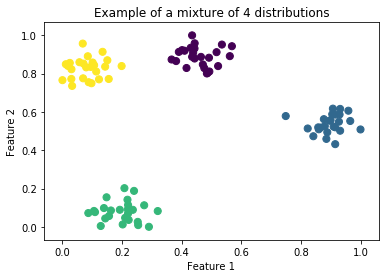

In [4]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

n_components = 4
data, truth = make_blobs(n_samples=100, centers=n_components, random_state=42, n_features=2)
data = preprocessing.MinMaxScaler().fit_transform(data)
plt.scatter(data[:, 0], data[:, 1], s=50, c = truth)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

该数据集中，有2个维度，存在4个簇。算法选择参数nBins = 8,nPoints = 2。  
算法选择由下至上的思路，从1D开始。如果2个以上的dense units为邻居，则将它们合并为一个更大的bin。如果将这些格子转换为网络图，这个操作就可以很容易地进行，创建图的时候，每个dense units为节点，如果两个节点属于同一维度，而且他们相邻（他们之间的距离不超过1），则在两个节点之间生成边。

<img alt=""  width="500" height="360" src="./resource/1_IEhLyuCflUA-XIwcPJqjHw.png">


横轴维度区分两簇
<img alt=""  width="500" height="360" src="./resource/1_QlGgbOK9_3W1LnuJKibbOg.png">
纵轴维度区分三簇
<img alt=""  width="500" height="360" src="./resource/1_MmMK1SlBqzdwgCg8U-v7mQ.png">



接下来，我们要从2D开始到所有D，计算所有可行的的簇。这个操作可以转化为计算k个维度的dense units的融合，并只保留有重叠的且连续的dense bins的结果。在计算完k-1维度的dense units后，我们可以通过计算所有k-1维度的dense units的融合而扩展到第k维。  

<img alt=""  width="1000" height="360" src="./resource/c75c10385343fbf224b69b11929e698464388f4a.jpeg">
在上面的数据中，我们可以得到下图的聚类结果。  
紫色点不属于任何类簇，因为他们所属的栅格中数据个数小于2个（nPoints）
<img alt=""  width="500" height="360" src="./resource/1_434TdPdpi1eEZWno4Ez4Vg.png">


派系算法对它参数的选择非常敏感（nBins和nPoints）。不过，它是由下至上算法家族中最基础的算法。

# 基于谱聚类的子空间聚类

实际上，谱聚类实现的就是子空间聚类  
回想一下，我们在谱聚类最后一步的时候,$L$矩阵有$n$个维度，我们只通过最小的$k$个特征值所对应的特征向量对数据进行kmeans聚类，就只考虑了$k$个维度，这不就是子空间吗    
前面我们讲到，谱聚类中需要构建相似矩阵(affinity matrix)，以$W$或者$A$表示

## Self-Expressiveness affinity（基于自表达性的相似度矩阵）

概念：从线性子空间中提取的一个数据点$x_i$可以由同一子空间中其他点的线性组合表示将所有点叠加到数据矩阵$X$的列中，其自表达性可以简单地描述为$$X = XC$$其中$C$为Self-Expressiveness系数矩阵，$X$矩阵为$(n*m)$，$C$矩阵为$(m*m)$，$XC$矩阵为$(n*m)$，$n$为数据记录数，$m$为每条数据的维度。在这里，以OD矩阵为例，$n$为OD对数，$m$为时间，即  

|X矩阵|1日|2日|...|m日|
|----|||||
|A到B|20|30|...|40|
|A到C|20|30|...|40|
|...|...|...|...|...|
|n|20|30|...|40|

|C矩阵|1日|2日|...|m日|
|----|||||
|1日|0|相似度|...|相似度|
|2日|相似度|0|...|相似度|
|...|...|...|...|...|
|m日|相似度|相似度|...|0|

假设子空间都是独立的，最小化$C$矩阵的范数，就可以保证$C$在以某些顺序排列的时候出现块状对角线结构，也因此可以以$C$矩阵来构建相似度矩阵用于谱聚类[P. Ji, M. Salzmann, and H. Li. Efficient dense subspace clustering. In WACV, pages 461–468. IEEE, 2014.]  
在数学上为：  
$$min{{ \left\Vert {C} \right\Vert }_{p}}$$  
$$s.t. diag(C)=0$$  
$$X = XC$$  
$$C\geqslant0$$  
其中，${ \left\Vert {C} \right\Vert }_{p}$为矩阵$C$的任意范数
找到这样子的$C$,就可以构建出谱聚类所需的相似度矩阵$A$:
$$A=C^T+C$$

<div class="alert alert-info"><h3>*常见的矩阵范数总结  </h3><p>  
${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{0}}}$  L0范数:表示向量x中非零元素的个数  <br>  
${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{1}}}$  L1范数（列模）:表示向量x中非零元素的绝对值之和  <br>  
${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{2}}}$  L2范数（谱模）:表示向量元素的平方和再开平方求$A^{T}A$的特征值，找出其中的最大特征值，求其平方根,相当于$max(sqrt(eig(A^{T}A)))$，也叫谱范数  <br>  
${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{F}}}$  F范数:是把一个矩阵中每个元素的平方求和后开根号(用于表示矩阵量级)   <br>  
${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{\infty}}}$  无穷范数（行模）:度量向量元素的最大值   <br>  
${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{*}}}$  核范数Nuclear Norm:矩阵奇异值的和(用于表示低秩矩阵)<br>  

</p></div>

而在实际的数据集中，存在数据噪声，因此将问题调整为：  
$$min{{ \left\Vert {C} \right\Vert }\mathop{{}}\nolimits_{{F}}}+\frac{\lambda}{2}{{ \left\Vert {X-XC} \right\Vert }\mathop{{}}\nolimits_{{F}}}^2$$  
$$s.t. diag(C)=0$$  
$$C\geqslant0$$  
找到这样子的$C$,就可以用谱聚类

上面的目标函数，其实相当于同时达成两个目标，即：
1. ${ \left\Vert {C} \right\Vert }\mathop{{}}\nolimits_{{F}}$最小，这个是为了满足Self-Expressiveness系数矩阵定义
2. ${ \left\Vert {X-XC} \right\Vert }\mathop{{}}\nolimits_{{F}}$最小，实际上$XC$是我们构建出来的矩阵，$X-XC$是噪声矩阵，即噪声最小  

那么，这个目标函数相当于我们能够同时完成去噪声和降维的工作,例如：  
<img alt=""  width="500" height="360" src="./resource/20150314105633589.jpg">


## 那么，如何求解，$C$矩阵怎么获得?

### Deep Adversarial Subspace Clustering（2018年机器学习领域论文）

[【论文阅读】Deep Adversarial Subspace Clustering](https://www.cnblogs.com/EstherLjy/p/9840016.html)  
[Deep-subspace-clustering-networks github](https://github.com/panji1990/Deep-subspace-clustering-networks)  
给出的解决方案是搭建Deep Convolutional Auto-Encoder  
<img src = "./resource/Deepautoencoder.png" style="width:800px">
损失函数为  
<img src = "./resource/lossfunction1.png" style="width:800px">
其中

In [246]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

EPOCH = 100
BATCH_SIZE = 500
LR = 0.01
DOWNLOAD_MNIST = False

train_data = torchvision.datasets.MNIST(
    root = './mnist',
    train = True,
    transform = torchvision.transforms.ToTensor(), #从0-255压缩到0-1
    download =DOWNLOAD_MNIST
)

# 先转换成 torch 能识别的 Dataset
torch_dataset = Data.TensorDataset(train_data.train_data[:BATCH_SIZE], train_data.train_labels[:BATCH_SIZE])

# 把 dataset 放入 DataLoader
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=False,               # 要不要打乱数据 (打乱比较好)
    num_workers=2,              # 多线程来读数据
)
        

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


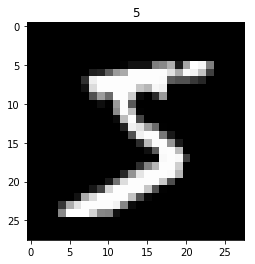

In [250]:
i = 0
def printdata(x,y):
    plt.imshow(x,cmap = 'gray')
    plt.title(y)
    plt.show()
printdata(train_data.train_data[i],str(train_data.train_labels[i].numpy()))

In [251]:
import numpy as np

class DSC(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28,128),
            nn.Tanh(),
            nn.Linear(128,64),
            nn.Tanh(),
            nn.Linear(64,12),
            nn.Tanh(),
            nn.Linear(12,5),

        )
        self.selfexpr = nn.Linear(BATCH_SIZE,BATCH_SIZE,bias=False)
        
        
        self.decoder = nn.Sequential(
            nn.Linear(5,12),
            nn.Tanh(),
            nn.Linear(12,64),
            nn.Tanh(),
            nn.Linear(64,128),
            nn.Tanh(),
            nn.Linear(128,28*28),
            nn.Sigmoid()
        )
        
        
    def forward(self,x):
        z = self.encoder(x)
        z = torch.transpose(z, 1, 0)
        z_ = self.selfexpr(z)
        z_ = torch.transpose(z_, 1, 0)
        x_ = self.decoder(z_)
        return z,z_,x_

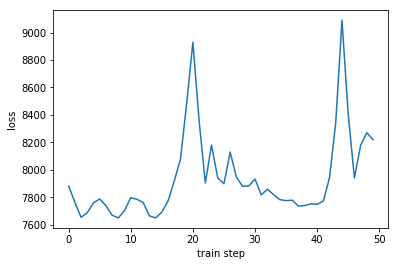

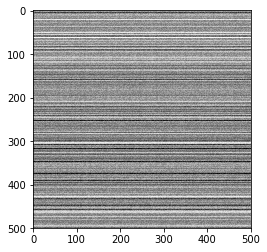

In [297]:
dsc = DSC()

dsc.cuda()
optimizer = torch.optim.Adam(dsc.parameters(),lr = LR,betas = (0.9,0.99))    
loss_func = torch.nn.MSELoss()

loss_list = [] 
lambda1 = 1
lambda2 = 10**(epoch/10-3)

steps = []
for epoch in range(1000):   # 训练所有!整套!数据 EPOCH 次
    for step, (batch_x, batch_y) in enumerate(loader):  # 每一步 loader 释放一小批数据用来学习
        steps.append(step)
        batch_x = (batch_x.view(-1,28*28).type(torch.FloatTensor)/255).cuda()
        batch_y = batch_y.cuda()
        
        z,z_,x_ = dsc(batch_x)
        
        C = dsc.selfexpr.state_dict()['weight']
        
        loss = 1/2*torch.norm(x_-batch_x)**2+lambda1*torch.norm(C)+lambda2/2*torch.norm(torch.transpose(z, 1, 0)-z_)**2
        
        loss_list.append(loss)
        
        optimizer.zero_grad()      #初始化梯度
        loss.backward()         #计算梯度
        optimizer.step()        #对参数学习


        import IPython
        IPython.display.clear_output(wait=True)
        plt.plot(range(len(steps[-50:])),loss_list[-50:])
        plt.ylabel('loss')
        plt.xlabel('train step')

        plt.show()


C = dsc.selfexpr.state_dict()['weight'].cpu().numpy()
plt.imshow(C,cmap = 'Greys')
plt.show()

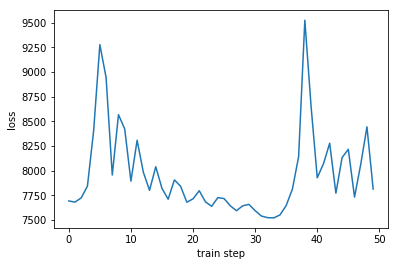

In [ ]:
for epoch in range(1000):   # 训练所有!整套!数据 EPOCH 次
    for step, (batch_x, batch_y) in enumerate(loader):  # 每一步 loader 释放一小批数据用来学习
        steps.append(step)
        batch_x = (batch_x.view(-1,28*28).type(torch.FloatTensor)/255).cuda()
        batch_y = batch_y.cuda()
        
        z,z_,x_ = dsc(batch_x)
        
        C = dsc.selfexpr.state_dict()['weight']
        
        loss = 1/2*torch.norm(x_-batch_x)**2+lambda1*torch.norm(C)+lambda2/2*torch.norm(torch.transpose(z, 1, 0)-z_)**2
        
        loss_list.append(loss)
        
        optimizer.zero_grad()      #初始化梯度
        loss.backward()         #计算梯度
        optimizer.step()        #对参数学习


        import IPython
        IPython.display.clear_output(wait=True)
        plt.plot(range(len(steps[-50:])),loss_list[-50:])
        plt.ylabel('loss')
        plt.xlabel('train step')

        plt.show()

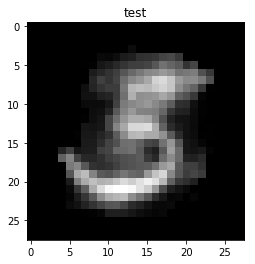

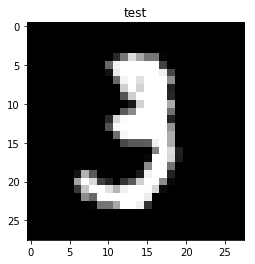

In [305]:
i = 10
def printdata(x,y):
    plt.imshow(x,cmap = 'gray')
    plt.title(y)
    plt.show()
printdata(x_[i].view(28,28).cpu().data.numpy(),'test')
def printdata(x,y):
    plt.imshow(x,cmap = 'gray')
    plt.title(y)
    plt.show()
printdata(batch_x[i].view(28,28).cpu().data.numpy(),'test')

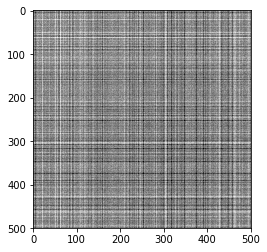

In [302]:
A = C+C.T
plt.imshow(A,cmap = 'Greys')
plt.show()

In [303]:
D = np.diag(A.sum(axis=1))
L = D - A
#计算特征值和特征向量
vals, vecs = np.linalg.eig(L)
#重新排序
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]
n = 10
#用kmeans对第2到第4个特征向量聚成4类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n)
kmeans.fit(vecs[:,:n])
spectral_labels = kmeans.labels_
spectral_labels

In [257]:
batch_y

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0,
        2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4, 5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2,
        8, 5, 8, 6, 7, 3, 4, 6, 1, 9, 9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9,
        7, 0, 9, 2, 9, 5, 1, 5, 9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5,
        0, 7, 4, 9, 7, 8, 3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3,
        0, 4, 6, 5, 2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5,
        8, 6, 3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7,
        9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9, 6, 5,
        7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3,

# 実験を始まります！

## pre training strategies

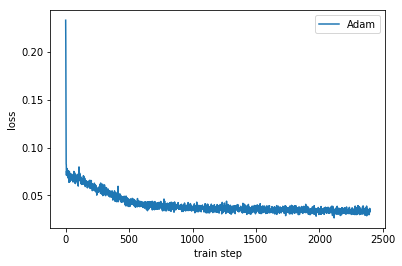

In [80]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

EPOCH = 2
BATCH_SIZE = 50
LR = 0.01
DOWNLOAD_MNIST = False

train_data = torchvision.datasets.MNIST(
    root = './mnist',
    train = True,
    transform = torchvision.transforms.ToTensor(), #从0-255压缩到0-1
    download =DOWNLOAD_MNIST
)

# 先转换成 torch 能识别的 Dataset
torch_dataset = Data.TensorDataset(train_data.train_data, train_data.train_labels)

# 把 dataset 放入 DataLoader
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=2,              # 多线程来读数据
)


class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28,128),
            nn.Tanh(),
            nn.Linear(128,64),
            nn.Tanh(),
            nn.Linear(64,12),
            nn.Tanh(),
            nn.Linear(12,10),

        )
        self.decoder = nn.Sequential(
            nn.Linear(10,12),
            nn.Tanh(),
            nn.Linear(12,64),
            nn.Tanh(),
            nn.Linear(64,128),
            nn.Tanh(),
            nn.Linear(128,28*28),
            nn.Sigmoid()
        )
        
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded,decoded

    
autoencoder = AutoEncoder()

autoencoder.cuda()
optimizer = torch.optim.Adam(autoencoder.parameters(),lr = LR,betas = (0.9,0.99))    
loss_func = torch.nn.MSELoss()

loss_list = [] 


for epoch in range(EPOCH):   # 训练所有!整套!数据 EPOCH 次
    for step, (batch_x, batch_y) in enumerate(loader):  # 每一步 loader 释放一小批数据用来学习
        batch_x = (batch_x.view(-1,28*28).type(torch.FloatTensor)/255).cuda()
        batch_y = batch_y.cuda()
        
        encoded,decoded = autoencoder(batch_x)

        loss = loss_func(decoded,batch_x)
        
        loss_list.append(loss)
        
        optimizer.zero_grad()      #初始化梯度
        loss.backward()         #计算梯度
        optimizer.step()        #对参数学习

import IPython
IPython.display.clear_output(wait=True)

plt.ylabel('loss')
plt.xlabel('train step')
plt.plot(range(len(loss_list)),loss_list,label='Adam')
plt.legend()
plt.show()



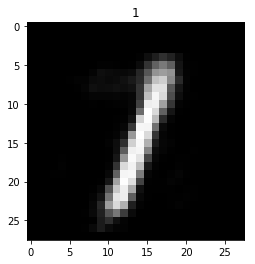

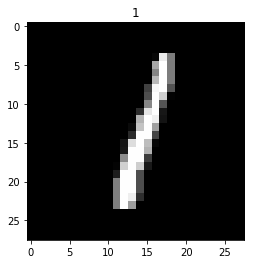

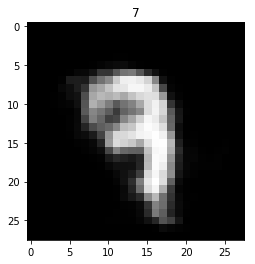

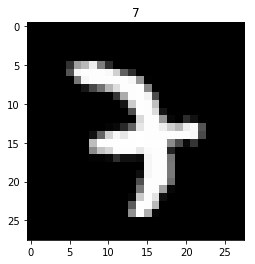

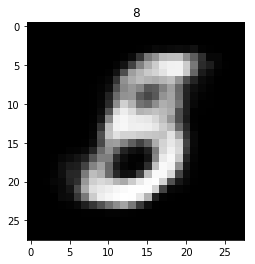

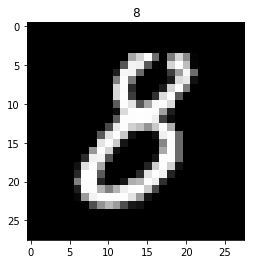

In [81]:
def printdata(x,y):
    plt.imshow(x,cmap = 'gray')
    plt.title(y)
    plt.show()
for i in range(3):
    printdata(decoded[i].view(28,28).cpu().data.numpy(),str(batch_y[i].cpu().numpy()))
    printdata(batch_x[i].view(28,28).cpu().numpy(),str(batch_y[i].cpu().numpy()))

## fine-tuning strategies

### 提取参数

In [82]:
import numpy as np
latent_features = 10

class DSC(nn.Module):
    def __init__(self,autoencoder,BATCH_SIZE):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28,128),
            nn.Tanh(),
            nn.Linear(128,64),
            nn.Tanh(),
            nn.Linear(64,12),
            nn.Tanh(),
            nn.Linear(12,10),

        )
        self.encoder.load_state_dict(autoencoder.encoder.state_dict())
        
        kill_matrix = np.ones((BATCH_SIZE,BATCH_SIZE))
        for i in range(BATCH_SIZE):
            kill_matrix[i][i]=0
        self.k = torch.tensor(kill_matrix,dtype=torch.float, requires_grad=False)
        self.m = torch.zeros([BATCH_SIZE,BATCH_SIZE],dtype=torch.float ,requires_grad=True)
        
        self.decoder = nn.Sequential(
            nn.Linear(10,12),
            nn.Tanh(),
            nn.Linear(12,64),
            nn.Tanh(),
            nn.Linear(64,128),
            nn.Tanh(),
            nn.Linear(128,28*28),
            nn.Sigmoid()
        )
        self.decoder.load_state_dict(autoencoder.decoder.state_dict())
        
        ### //不训练某些层
        frozen_layers = [self.encoder, self.decoder,]
        for layer in frozen_layers:
            for name, value in layer.named_parameters():
                value.requires_grad = False
        
    def forward(self,x):
        z = self.encoder(x)
        z = torch.transpose(z, 1, 0)
        c = self.k.mul(self.m)
        z_ = z.mm(c)
        x_ = torch.transpose(z_, 1, 0)
        x_ = self.decoder(x_)
        return z,z_,x_,c

### 开始炼丹

In [83]:
DOWNLOAD_MNIST = False

train_data = torchvision.datasets.MNIST(
    root = './mnist',
    train = True,
    transform = torchvision.transforms.ToTensor(), #从0-255压缩到0-1
    download =DOWNLOAD_MNIST
)

# 先转换成 torch 能识别的 Dataset
torch_dataset = Data.TensorDataset(train_data.train_data[:BATCH_SIZE], train_data.train_labels[:BATCH_SIZE])

# 把 dataset 放入 DataLoader
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=False,               # 要不要打乱数据 (打乱比较好)
    num_workers=2,              # 多线程来读数据
)
        

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


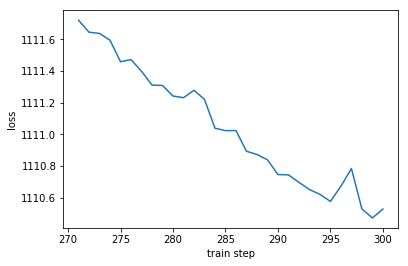

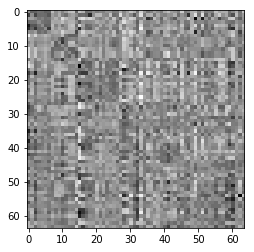

In [112]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

K = 10
EPOCH = 50+25*K
BATCH_SIZE = 64
LR = 0.01
DOWNLOAD_MNIST = False

train_data = torchvision.datasets.MNIST(
    root = './mnist',
    train = True,
    transform = torchvision.transforms.ToTensor(), #从0-255压缩到0-1
    download =DOWNLOAD_MNIST
)

# 先转换成 torch 能识别的 Dataset
torch_dataset = Data.TensorDataset(train_data.train_data[:BATCH_SIZE], train_data.train_labels[:BATCH_SIZE])

# 把 dataset 放入 DataLoader
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=False,               # 要不要打乱数据 (打乱比较好)
    num_workers=2,              # 多线程来读数据
)


dsc = DSC(autoencoder,BATCH_SIZE)
dsc


optimizer = torch.optim.Adam([dsc.m],lr = LR,betas = (0.9,0.99),weight_decay=1e-5)    
loss_func = torch.nn.MSELoss()

loss_list = [] 
lambda1 = 1
lambda2 = 10**(K/10-3)

steps = []
t = 0
for epoch in range(EPOCH):   # 训练所有!整套!数据 EPOCH 次
    for step, (batch_x, batch_y) in enumerate(loader):  # 每一步 loader 释放一小批数据用来学习
        t+=1
        steps.append(t)
        batch_x = (batch_x.view(-1,28*28).type(torch.FloatTensor)/255)
        batch_y = batch_y
        
        batch_y,index_ = batch_y.sort()
        batch_x = batch_x[index_]
        
        z,z_,x_,c = dsc(batch_x)
        
        
        
        loss = 1/2*torch.norm(x_-batch_x)**2+lambda1*torch.norm(c)+\
        lambda2/2*torch.norm(z-z_)**2
        
        loss_list.append(loss)
        
        optimizer.zero_grad()      #初始化梯度
        loss.backward()         #计算梯度
        optimizer.step()        #对参数学习


        import IPython
        IPython.display.clear_output(wait=True)
        plt.plot(steps[-30:],loss_list[-30:])
        plt.ylabel('loss')
        plt.xlabel('train step')

        plt.show()


C = c.data.numpy()
plt.imshow(C,cmap = 'Greys')
plt.show()

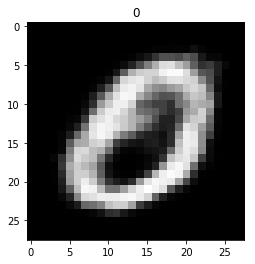

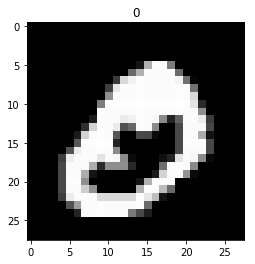

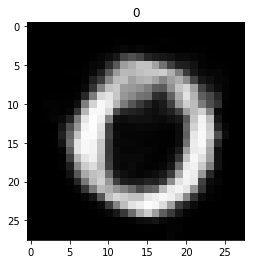

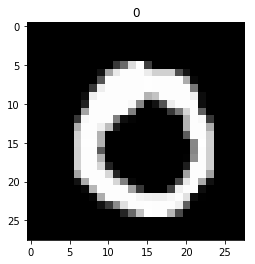

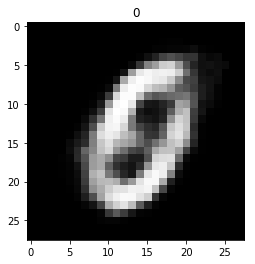

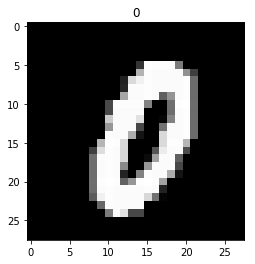

In [115]:
def printdata(x,y):
    plt.imshow(x,cmap = 'gray')
    plt.title(y)
    plt.show()
for i in range(3):
    printdata(x_[i].view(28,28).cpu().data.numpy(),str(batch_y[i].cpu().numpy()))
    printdata(batch_x[i].view(28,28).cpu().numpy(),str(batch_y[i].cpu().numpy()))

In [117]:
np.matmul(z.numpy(),C),z.data.numpy()

(array([[ 1.20576978e+00,  2.66972721e-01,  3.83623391e-02,
         -4.57601517e-01, -5.09580970e-02,  1.13464499e+00,
         -8.31992984e-01, -1.40674603e+00, -9.70266521e-01,
         -1.08433700e+00, -1.60010302e+00, -9.58125114e-01,
         -1.34503126e+00, -1.12922454e+00, -1.88359007e-01,
          3.49861884e+00,  1.34379268e-02,  4.44763690e-01,
          7.17804193e-01,  8.03960681e-01,  7.37778962e-01,
          2.66724920e+00,  9.26708877e-01,  1.24766326e+00,
          7.32824624e-01,  1.59421110e+00, -3.46159548e-01,
         -1.54587662e+00,  2.00167418e+00,  8.80079567e-01,
          4.91081774e-01, -8.43377888e-01, -2.19111276e+00,
         -1.56400949e-01, -1.61205411e+00, -3.74720931e-01,
          8.71458173e-01, -1.64163733e+00, -7.37363875e-01,
         -1.28580141e+00, -1.37574649e+00, -2.31410074e+00,
         -1.25875688e+00, -1.06051290e+00, -9.86639678e-01,
         -8.36536467e-01,  1.57057926e-01, -8.88472795e-01,
          1.71555385e-01,  1.18819916e+0

In [101]:
C

array([[ 0.0000000e+00,  1.0113709e-02,  8.4769595e-03, ...,
         5.1099188e-03,  1.1498177e-02, -4.0232805e-03],
       [ 8.8272048e-03,  0.0000000e+00,  1.2509774e-02, ...,
         1.1770651e-02, -1.2279133e-02, -4.0153102e-03],
       [ 1.1084562e-02,  1.8770481e-02,  0.0000000e+00, ...,
         1.3138597e-02,  7.5483383e-03,  1.9067800e-02],
       ...,
       [ 5.7351333e-03,  1.2529346e-02,  1.1859529e-02, ...,
         0.0000000e+00, -1.3995894e-02, -3.6405106e-03],
       [ 1.6392682e-02, -9.6394122e-03,  7.3988824e-03, ...,
        -1.9019835e-02,  0.0000000e+00,  4.8323264e-03],
       [-2.8756424e-03, -9.9099125e-06,  1.5107048e-02, ...,
         8.3220308e-04,  4.5808102e-03,  0.0000000e+00]], dtype=float32)

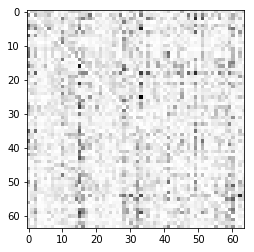

In [118]:
C = c.data.numpy()
plt.imshow(abs(C),cmap = 'Greys')
plt.show()

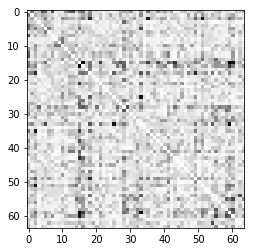

In [119]:
A = abs(C)+abs(C.T)
plt.imshow(A,cmap = 'Greys')
plt.show()

In [120]:
D = np.diag(A.sum(axis=1))
L = D - A
#计算特征值和特征向量
vals, vecs = np.linalg.eig(L)
#重新排序
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]
n = 2
#用kmeans对第2到第4个特征向量聚成4类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n)
kmeans.fit(vecs[:,:n])
spectral_labels = kmeans.labels_
spectral_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

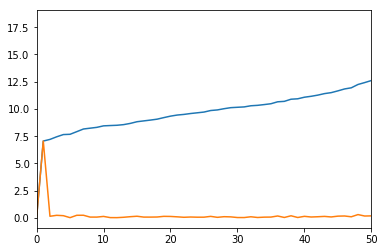

In [126]:
plt.plot(range(len(vals)),vals)

import pandas as pd
a = pd.DataFrame(vals)
eigngap = a-a.shift().fillna(0)
plt.plot(range(len(eigngap)),eigngap)
plt.xlim(0,50)
plt.show()

In [127]:
z.size()

torch.Size([10, 64])